# Lecture 4

## Exercise 4.2

By means of your upgraded code, <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained progressive average values and uncertainties as a functions of the increasing number of blocks for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$, in reduced units!

### <span style="color:green"> Equilibration is needed!</span>

By monitoring the temperature, $T$, during the first time steps of the simulation, you will observe that at the beginning, starting from a perfect crystalline configuration, $T$ will not conserve its value. Can you understand and explain this behaviour?

Explore and find the starting value of $T$ needed to stabilize, after a certain number of time steps (equilibration time), the average value of $T$ on the desired $T^\star$. <span style="color:red">Perform your solid/liquid phase MD simulations by re-starting them after such equilibration time.</span>

## Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Equilibration

In [2]:
def plot_equilibration(data_paths, labels, colors, hline_value, title):
    temp_data = [np.loadtxt(path) for path in data_paths]
    plt.style.use('seaborn-darkgrid')
    fig, ax1 = plt.subplots(figsize=(16, 10))

    for data, label, color in zip(temp_data, labels, colors):
        ax1.errorbar(data[:, 0], data[:, 1], yerr=0, fmt='-', color=color, label=label, linewidth=1, markersize=1)
        ax1.errorbar(data[:, 0], data[:, 2], yerr=data[:, 3], fmt='-', color=color, linewidth=1, markersize=1)
    plt.axhline(y=hline_value, color='black', linestyle='--', label='Target temp', linewidth=4)
    ax1.set_xlabel("Blocks", fontsize=14)
    ax1.set_ylabel("Temperature", fontsize=14)
    ax1.grid(True)
    ax1.legend(loc='best', fontsize=12)
    fig.suptitle(title, fontsize=30, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

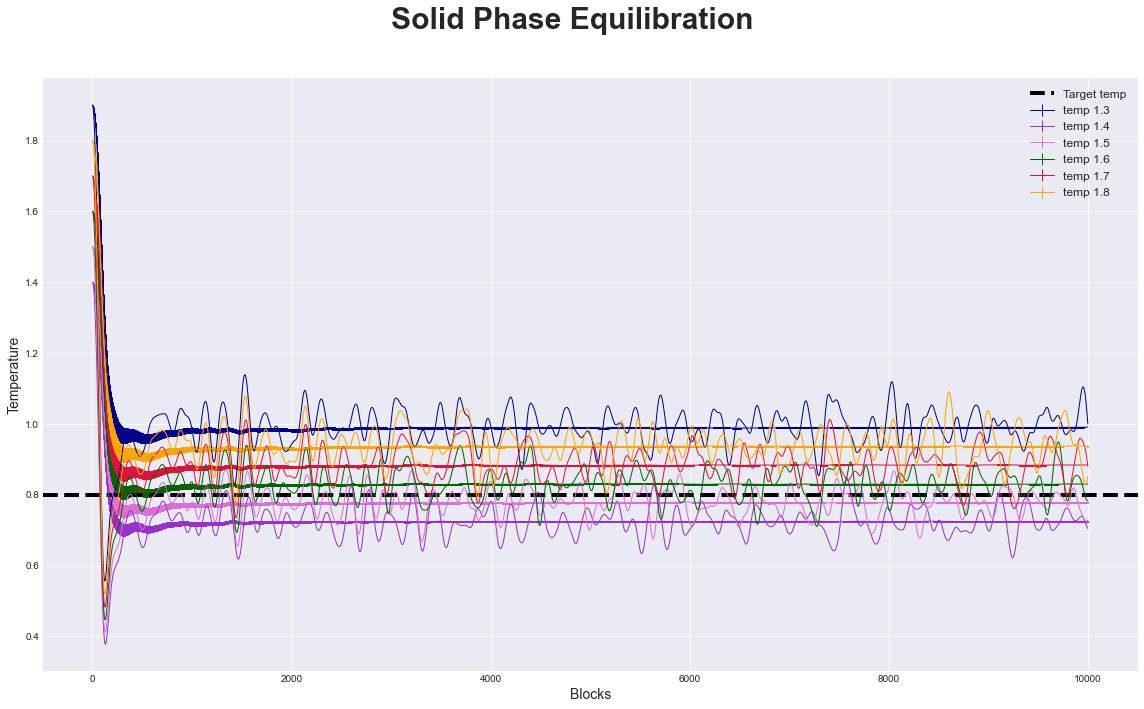

In [3]:
# Parameters for Solid Phase Equilibration
data_paths_solid = [
    'NSL_SIMULATOR/ES4/Equilibration/Solid/OUTPUT/temperature_1.300000.dat',
    'NSL_SIMULATOR/ES4/Equilibration/Solid/OUTPUT/temperature_1.400000.dat',
    'NSL_SIMULATOR/ES4/Equilibration/Solid/OUTPUT/temperature_1.500000.dat',
    'NSL_SIMULATOR/ES4/Equilibration/Solid/OUTPUT/temperature_1.600000.dat',
    'NSL_SIMULATOR/ES4/Equilibration/Solid/OUTPUT/temperature_1.700000.dat',
    'NSL_SIMULATOR/ES4/Equilibration/Solid/OUTPUT/temperature_1.800000.dat'
]
labels_solid = ['temp 1.3', 'temp 1.4', 'temp 1.5', 'temp 1.6', 'temp 1.7', 'temp 1.8']
colors_solid = ['darkblue', 'darkorchid', 'orchid', 'darkgreen', 'crimson', 'orange']
hline_value_solid = 0.8
title_solid = "Solid Phase Equilibration"

plot_equilibration(data_paths_solid, labels_solid, colors_solid, hline_value_solid, title_solid)


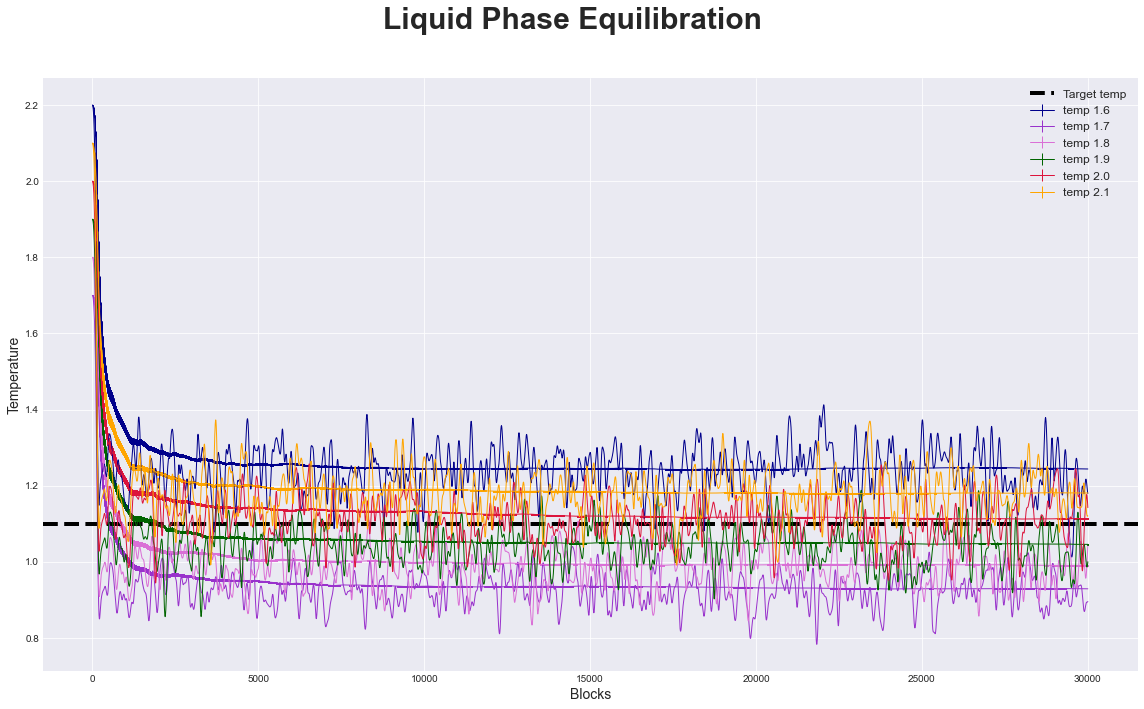

In [4]:
# Parameters for Liquid Phase Equilibration
data_paths_liquid = [
    'NSL_SIMULATOR/ES4/Equilibration/Liquid/OUTPUT/temperature_1.600000.dat',
    'NSL_SIMULATOR/ES4/Equilibration/Liquid/OUTPUT/temperature_1.700000.dat',
    'NSL_SIMULATOR/ES4/Equilibration/Liquid/OUTPUT/temperature_1.800000.dat',
    'NSL_SIMULATOR/ES4/Equilibration/Liquid/OUTPUT/temperature_1.900000.dat',
    'NSL_SIMULATOR/ES4/Equilibration/Liquid/OUTPUT/temperature_2.000000.dat',
    'NSL_SIMULATOR/ES4/Equilibration/Liquid/OUTPUT/temperature_2.100000.dat'
]
labels_liquid = ['temp 1.6', 'temp 1.7', 'temp 1.8', 'temp 1.9', 'temp 2.0', 'temp 2.1']
colors_liquid = ['darkblue', 'darkorchid', 'orchid', 'darkgreen', 'crimson', 'orange']
hline_value_liquid = 1.1
title_liquid = "Liquid Phase Equilibration"

plot_equilibration(data_paths_liquid, labels_liquid, colors_liquid, hline_value_liquid, title_liquid)


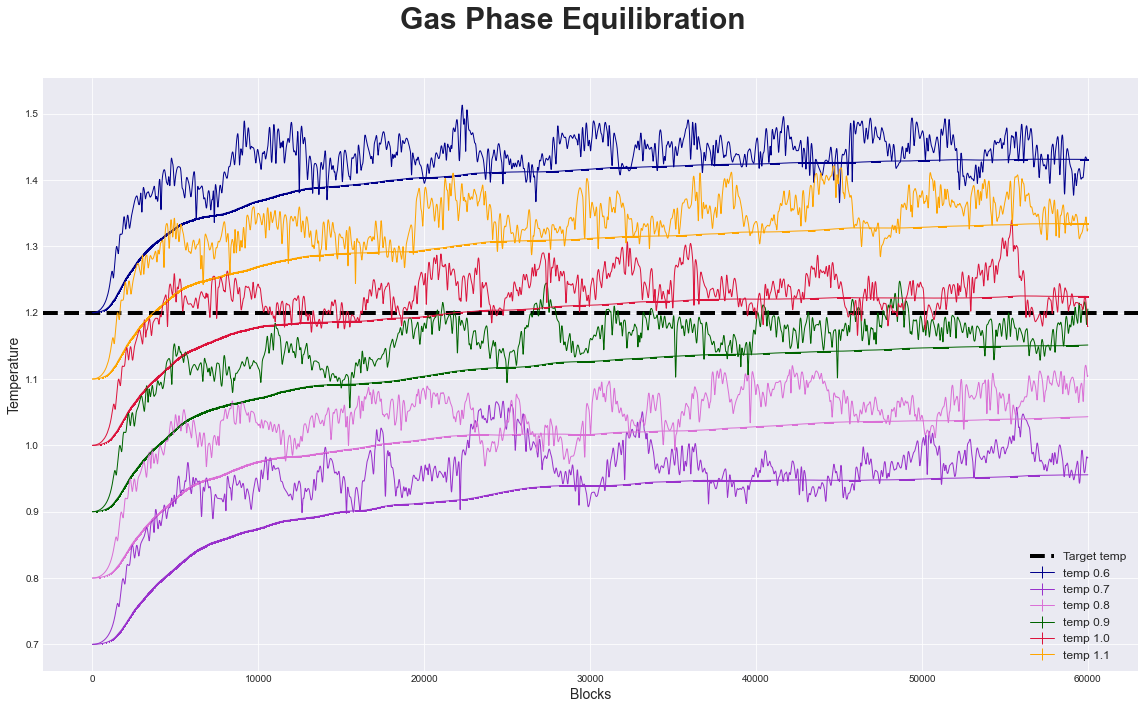

In [5]:
# Parameters for Gas Phase Equilibration
data_paths_gas = [
    'NSL_SIMULATOR/ES4/Equilibration/Gas/OUTPUT/temperature_0.600000.dat',
    'NSL_SIMULATOR/ES4/Equilibration/Gas/OUTPUT/temperature_0.700000.dat',
    'NSL_SIMULATOR/ES4/Equilibration/Gas/OUTPUT/temperature_0.800000.dat',
    'NSL_SIMULATOR/ES4/Equilibration/Gas/OUTPUT/temperature_0.900000.dat',
    'NSL_SIMULATOR/ES4/Equilibration/Gas/OUTPUT/temperature_1.000000.dat',
    'NSL_SIMULATOR/ES4/Equilibration/Gas/OUTPUT/temperature_1.100000.dat'
]
labels_gas = ['temp 0.6', 'temp 0.7', 'temp 0.8', 'temp 0.9', 'temp 1.0', 'temp 1.1']
colors_gas = ['darkblue', 'darkorchid', 'orchid', 'darkgreen', 'crimson', 'orange']
hline_value_gas = 1.2
title_gas = "Gas Phase Equilibration"

plot_equilibration(data_paths_gas, labels_gas, colors_gas, hline_value_gas, title_gas)

I have decided to plot both the average temperature and the instantaneous temperatures.

### Measurements

- **Number of Blocks:** 40
- **Steps per Block:** 2000
- **Total Steps:** 80,000
---
- **Solid Equilibration Steps:** 5,000
- **Liquid Equilibration Steps:** 30,000
- **Gas Equilibration Steps:** 60,000
---
- **$T_0$ Solid:** 1.55
- **$T_0$ Solid:** 1.99
- **$T_0$ Solid:** 0.97

In [6]:
# Function to load and plot data
def load_and_plot_data(file_paths, ylabel, title, suptitle, y_lines=None):
    data_labels = ['Gas', 'Solid', 'Liquid']
    colors = ['darkblue', 'darkorchid', 'orchid']

    plt.style.use('seaborn-darkgrid')
    fig, ax1 = plt.subplots(figsize=(16, 10))

    for i, file_path in enumerate(file_paths):
        data = np.loadtxt(file_path)
        ax1.errorbar(data[:, 0], data[:, 2], yerr=data[:, 3], fmt='o-', color=colors[i], label=data_labels[i], linewidth=2, markersize=5)
    
    if y_lines:
        for y in y_lines:
            plt.axhline(y=y, color='black', linestyle='--', linewidth=2)
    
    ax1.set_xlabel("Blocks", fontsize=14)
    ax1.set_ylabel(ylabel, fontsize=14)
    ax1.set_title(title, fontsize=18)
    ax1.grid(True)
    ax1.legend(loc='center right', fontsize=12)
    fig.suptitle(suptitle, fontsize=30, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

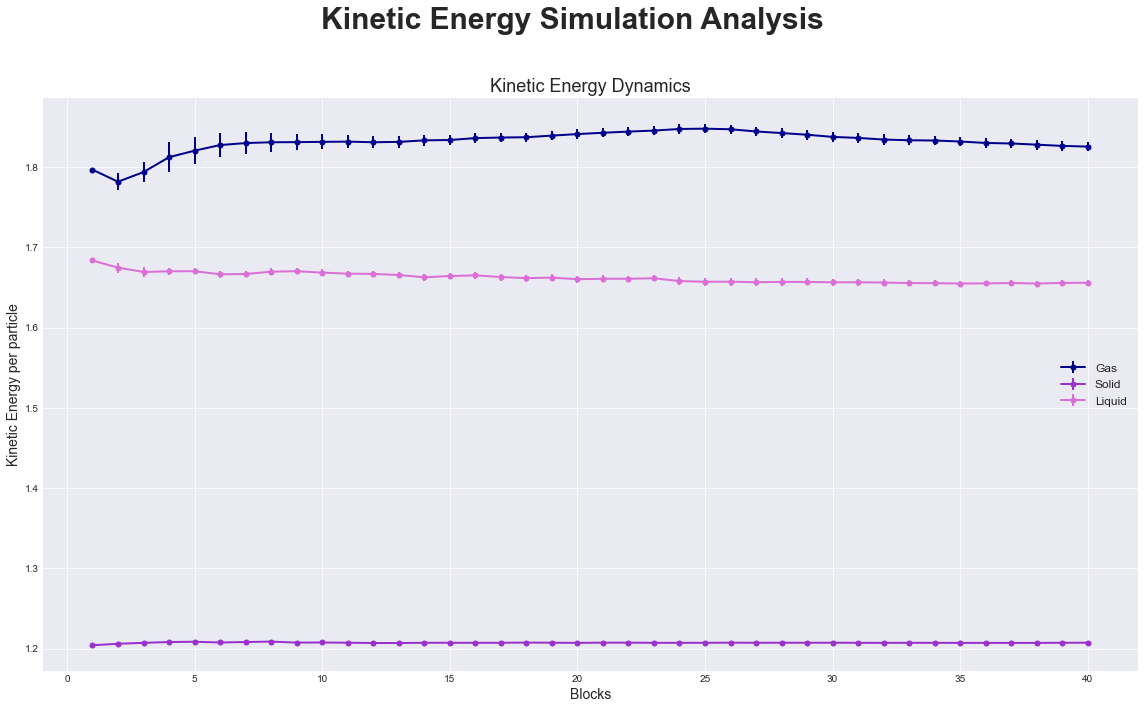

In [7]:
kenergy_paths = ['NSL_SIMULATOR/ES4/Gas/OUTPUT/kinetic_energy.dat', 
                 'NSL_SIMULATOR/ES4/Solid/OUTPUT/kinetic_energy.dat', 
                 'NSL_SIMULATOR/ES4/Liquid/OUTPUT/kinetic_energy.dat']

load_and_plot_data(kenergy_paths, "Kinetic Energy per particle", "Kinetic Energy Dynamics", "Kinetic Energy Simulation Analysis")

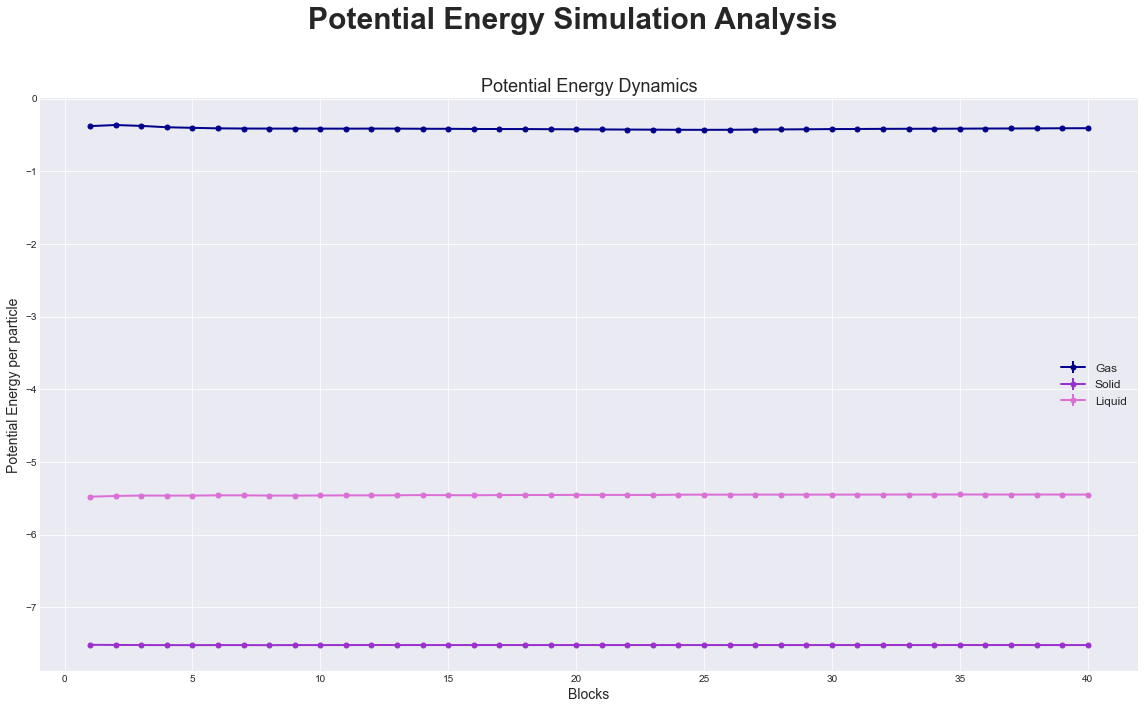

In [8]:
penergy_paths = ['NSL_SIMULATOR/ES4/Gas/OUTPUT/potential_energy.dat', 
                 'NSL_SIMULATOR/ES4/Solid/OUTPUT/potential_energy.dat', 
                 'NSL_SIMULATOR/ES4/Liquid/OUTPUT/potential_energy.dat']

load_and_plot_data(penergy_paths, "Potential Energy per particle", "Potential Energy Dynamics", "Potential Energy Simulation Analysis")

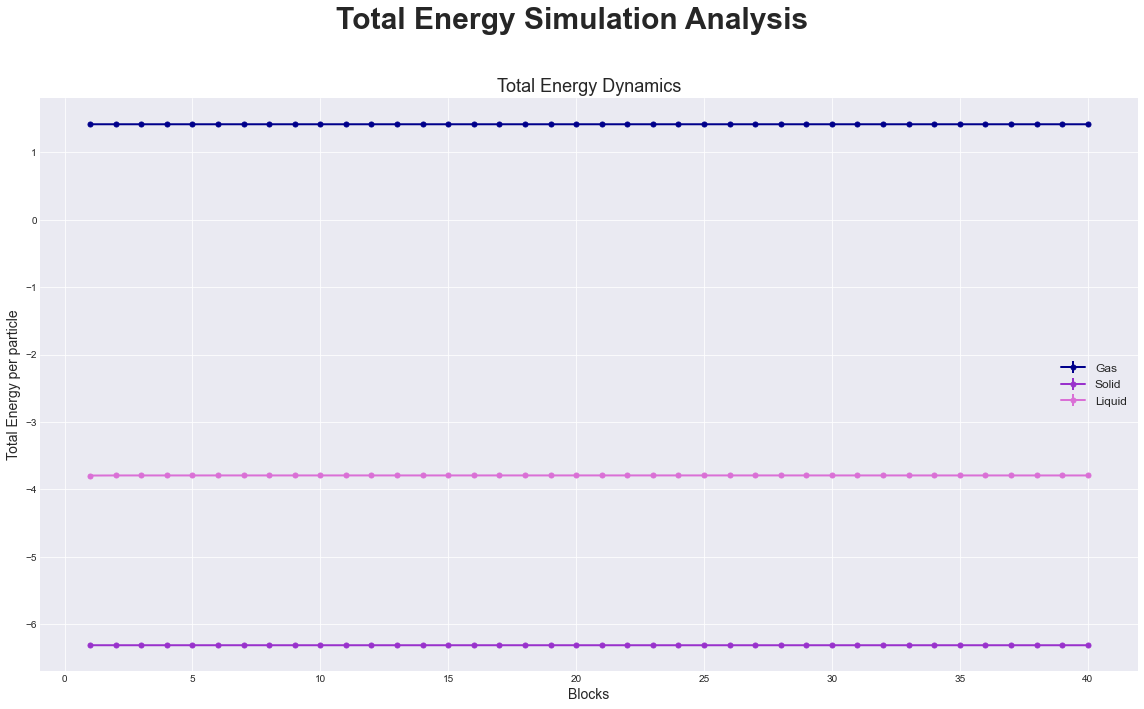

In [9]:
totenergy_paths = ['NSL_SIMULATOR/ES4/Gas/OUTPUT/total_energy.dat', 
                   'NSL_SIMULATOR/ES4/Solid/OUTPUT/total_energy.dat', 
                   'NSL_SIMULATOR/ES4/Liquid/OUTPUT/total_energy.dat']

load_and_plot_data(totenergy_paths, "Total Energy per particle", "Total Energy Dynamics", "Total Energy Simulation Analysis")

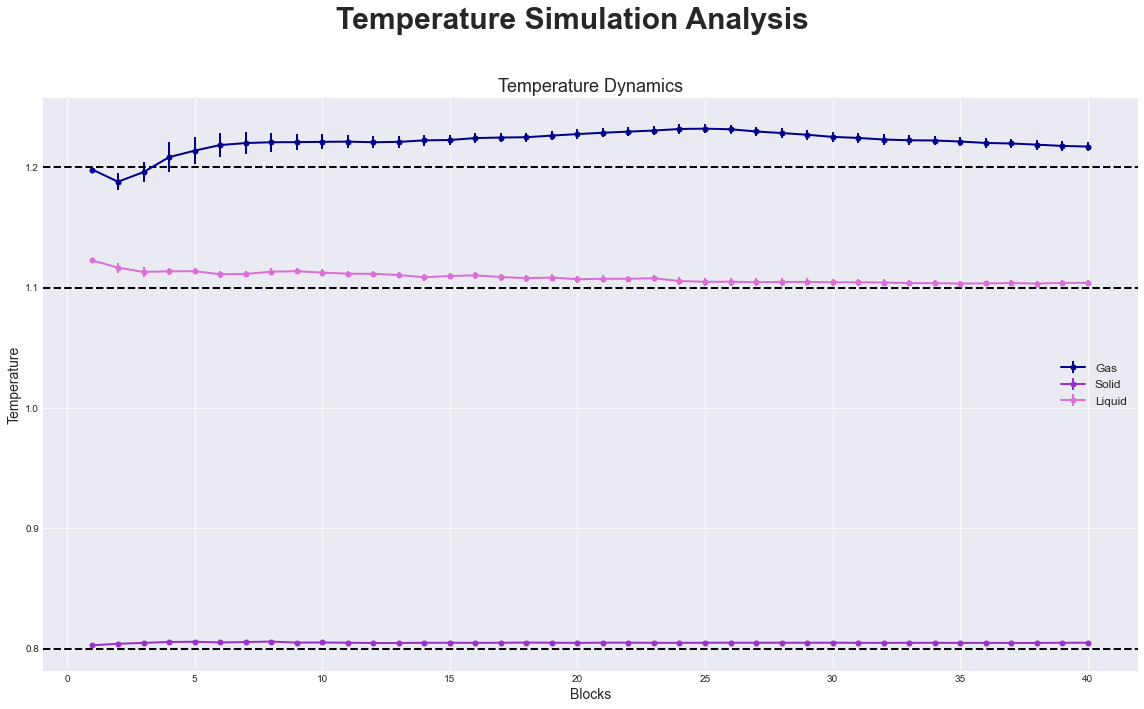

In [10]:
temperature_paths = ['NSL_SIMULATOR/ES4/Gas/OUTPUT/temperature.dat', 
                     'NSL_SIMULATOR/ES4/Solid/OUTPUT/temperature.dat', 
                     'NSL_SIMULATOR/ES4/Liquid/OUTPUT/temperature.dat']

load_and_plot_data(temperature_paths, "Temperature", "Temperature Dynamics", "Temperature Simulation Analysis", y_lines=[0.8, 1.1, 1.2])

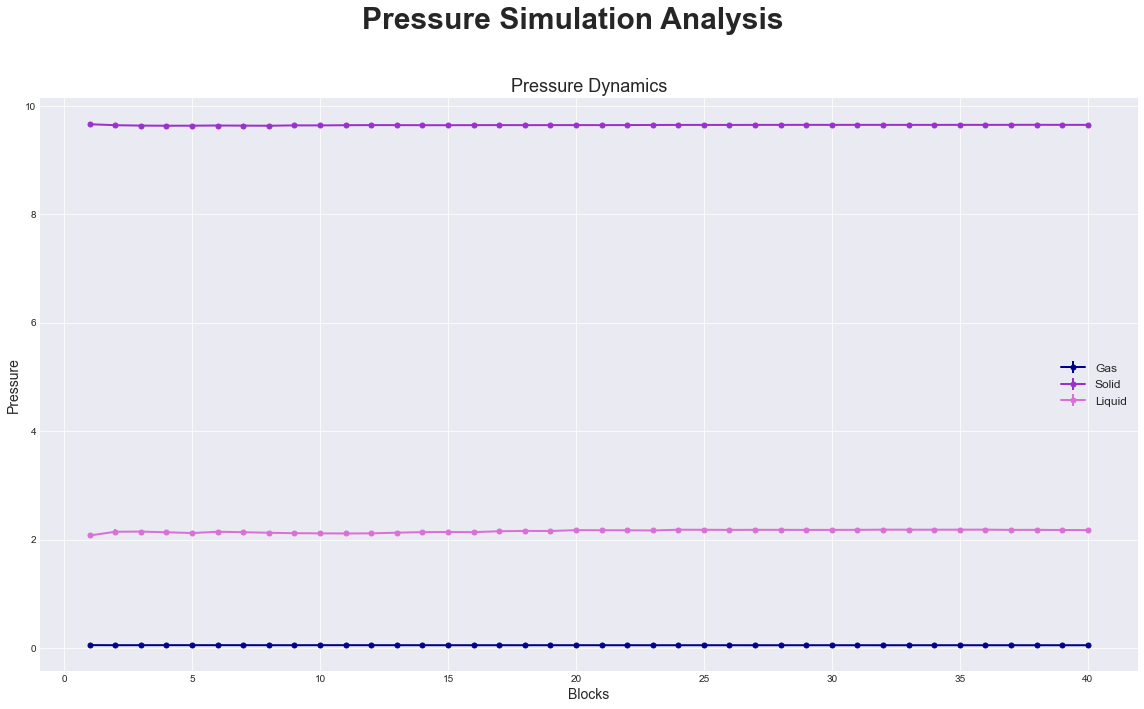

In [11]:
pressure_paths = ['NSL_SIMULATOR/ES4/Gas/OUTPUT/pressure.dat', 
                  'NSL_SIMULATOR/ES4/Solid/OUTPUT/pressure.dat', 
                  'NSL_SIMULATOR/ES4/Liquid/OUTPUT/pressure.dat']

load_and_plot_data(pressure_paths, "Pressure", "Pressure Dynamics", "Pressure Simulation Analysis")